In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
covid_singapore = pd.read_csv("twitter data scrape/covid_singapore_tweets.csv")
covid_singapore.head()

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/khainad/status/16307166453...,2023-02-28 23:48:40+00:00,Both my girls contracted covid and they’re jus...,Both my girls contracted covid and they’re jus...,1630716645357522944,https://twitter.com/khainad,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN
1,https://twitter.com/MattHarrisEdD/status/16306...,2023-02-28 22:30:03+00:00,5 Tips for CyberSafety for Families During COV...,5 Tips for CyberSafety for Families During COV...,1630696860598915075,https://twitter.com/MattHarrisEdD,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,"['Edtech', 'GlobalEd', 'elearning', 'edutech']",NaN,SummaryCard(title='5 Tips for CyberSafety for ...,72.0,NaN
2,https://twitter.com/Chindyagung1/status/163066...,2023-02-28 20:33:20+00:00,@AlgodTrading Imagine if you take vaccinate an...,@AlgodTrading Imagine if you take vaccinate an...,1630667487745576960,https://twitter.com/Chindyagung1,0,0,0,0,...,1.630642e+18,https://twitter.com/AlgodTrading,"[User(username='AlgodTrading', id=117864028365...",NaN,NaN,NaN,NaN,NaN,20.0,NaN
3,https://twitter.com/mfame_guru/status/16306590...,2023-02-28 19:59:48+00:00,Hong Kong is scrapping its COVID-19 mask manda...,Hong Kong is scrapping its COVID-19 mask manda...,1630659051599065088,https://twitter.com/mfame_guru,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='Hong Kong Ends One of World...,16.0,NaN
4,https://twitter.com/mfame_guru/status/16306565...,2023-02-28 19:50:00+00:00,The geopolitical uncertainty brought by the Uk...,The geopolitical uncertainty brought by the Uk...,1630656583733596160,https://twitter.com/mfame_guru,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='What are Business Leaders D...,7.0,NaN


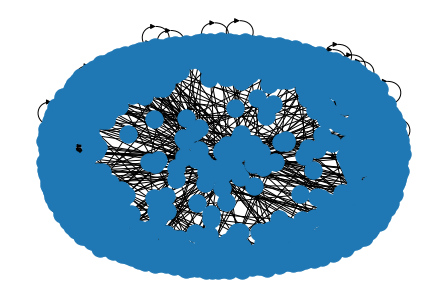

In [3]:
quote_graph = nx.DiGraph()

for i in range(len(covid_singapore)):
    if type(covid_singapore.iloc[i]["quotedTweet"]) == str:
        quote_graph.add_edge(covid_singapore.iloc[i]["user"].split("/")[3], covid_singapore.iloc[i]["quotedTweet"].split("/")[3])
        
nx.draw(quote_graph)

In [4]:
retweet_sources, retweet_target = [], []

for i in range(len(covid_singapore)):
    if type(covid_singapore.iloc[i]["retweetedTweet"]) == str:
        retweet_sources.append(covid_singapore.iloc[i]["user"].split("/")[3])
        retweet_target.append(covid_singapore.iloc[i]["retweetedTweet"].split("/")[3])
        
retweet_sources, retweet_target

([], [])

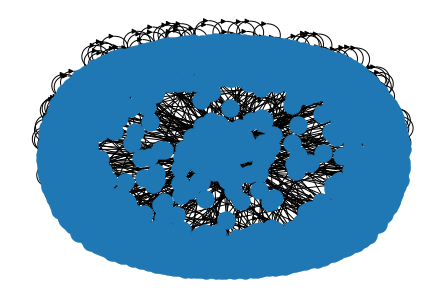

In [5]:
reply_graph = nx.DiGraph()

for i in range(len(covid_singapore)):
    if type(covid_singapore.iloc[i]["inReplyToUser"]) == str:
        reply_graph.add_edge(covid_singapore.iloc[i]["user"].split("/")[3], covid_singapore.iloc[i]["inReplyToUser"].split("/")[3])
        
nx.draw(reply_graph)